1. scraping data

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang = 'id', #utk menentukan bahasa yg akan di ambil
    country = 'id', #utk menentukan negara asal ulasan
    sort = Sort.MOST_RELEVANT, #umtuk mendapatkan ulasan yang paling relevant
    count = 1500, # mengambil ulasan sebanyak 1500
    filter_score_with = None #utk mengambil semua score/ rating bintang 1 - 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f59c34f5-e75c-4352-aa01-77500dbb43d1,ALGA JORDAN WARDANU.,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sebelum menggunakan Shopee, belanja online ter...",5,57,3.44.17,2025-02-21 08:23:29,"Hi kak Alga Jordan Wardanu, makasih ya buat re...",2025-02-21 09:34:37,3.44.17
1,a0fcad4b-5e3a-41bf-acc8-255a0b53c738,Opie Beaa,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uhhh....shopee....untuk pilihan barang, diskon...",1,6,3.44.17,2025-02-20 08:51:44,"Hallo kak, Makasih yaa buat review bintang 5 n...",2024-10-18 13:24:23,3.44.17
2,c0a0cc63-d690-4972-adb6-09ef6935d5b2,muhammad rozi,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya tidak bisa lagi cod. Gara gara barng bata...,1,8,3.44.17,2025-02-21 14:11:01,"Hai kak muhammad rozi, mohon maaf atas ketidak...",2025-02-21 15:08:09,3.44.17
3,040f8387-3f2f-4c0b-8629-89d20da1beac,Kinzy Arebejkid,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sangat d sayangkan,,aplikasi bagus tapi dari s...",3,3,3.44.17,2025-02-21 02:02:53,"Hai kak Kinzy , mohon maaf atas ketidaknyamana...",2025-02-21 03:13:23,3.44.17
4,c38b76ab-cd43-4281-82ae-4441ee8ef8f2,Sherylla Dyan,https://play-lh.googleusercontent.com/a-/ALV-U...,kenapa akhir akhir ini shopeefood ga bisa dibu...,3,5,3.44.17,2025-02-20 09:32:54,"Hai kak Sherylla Dyan , maaf buat kamu ga nyam...",2025-02-20 10:06:33,3.44.17


In [ ]:
df_busu[['userName', 'score','at','content']].tail() #mengambil kolom yang ada pada ulasan shoppe

,userName,score,at,content
1495,Sepnawita Sinuhaji,5,2025-01-06 22:32:15,belanja di shopee tidak pernah mengecewakan.. ...
1496,Darma Budi Setiawan,5,2024-12-02 14:41:21,Tempat belanja andalan saya..sdh gk terhitung ...
1497,Candra Alnega,4,2024-11-29 23:15:37,Sangat membantu..dan cepat Terima kasih atas p...
1498,Wina 059,5,2024-12-04 00:24:48,Kenapa sieh saldo udh cukup utk bayar msh jg d...
1499,Rudy Bungsu,5,2024-12-10 12:32:15,saya kasih ulasan 5 karena sya asli pengguna s...


In [ ]:
new_df = df_busu[['userName', 'score','at','content']]
sorted_df = new_df.sort_values(by = 'at', ascending=False) #diurutkan berdasarkan yg baling baru
sorted_df.tail()

,userName,score,at,content
913,jenzen (Kompas Jateng),5,2024-11-30 01:39:20,Parah bener aplikasi shoope versi terbaru. Men...
1497,Candra Alnega,4,2024-11-29 23:15:37,Sangat membantu..dan cepat Terima kasih atas p...
1426,Angga A.Y,5,2024-11-29 18:17:44,Ini shopee kenapa sih kok ngebug ??? Setiap ma...
1385,Aden Mindy,1,2024-11-28 11:38:59,"Jujur, shopee sekarang beda dengan yg dulu, co..."
1401,IFAN09,3,2024-11-27 13:54:04,Untuk sementara saya kasih bintang dua aja dul...


In [ ]:
my_df = sorted_df[['userName', 'score','at','content']]

In [ ]:
my_df = my_df[['content', 'score']]

In [ ]:
my_df.head()

,content,score
7,Shopee sangat membantu dengan banyaknya vouche...,2
993,"Masalah ini simple sebenarnya, kenapa selalu s...",5
318,sudah lumayan tetapi di beberapa waktu saat ad...,4
12,Dibanding TOKOPEDIA yg pakai expedisi yg cepat...,3
759,Memudah kan belanja jdi gak ribet untuk memenu...,5


pelabelan

In [ ]:
def pelabelan (score):
  if score < 3:
    return 'Negatif'
  elif score == 4:
    return 'Positif'
  elif score == 5:
    return 'Positif'

my_df['Label'] = my_df['score'].apply(pelabelan)


In [ ]:
my_df.head(50)

,content,score,Label
7,Shopee sangat membantu dengan banyaknya vouche...,2,Negatif
993,"Masalah ini simple sebenarnya, kenapa selalu s...",5,Positif
318,sudah lumayan tetapi di beberapa waktu saat ad...,4,Positif
12,Dibanding TOKOPEDIA yg pakai expedisi yg cepat...,3,None
759,Memudah kan belanja jdi gak ribet untuk memenu...,5,Positif
374,Terlalu banyak update. Tapi cuman makan data p...,1,Negatif
2,Saya tidak bisa lagi cod. Gara gara barng bata...,1,Negatif
1009,Kenpa ya jika kita 3 kali gagal memesan salalu...,4,Positif
31,Kadang proses penjemputan/pengemasan paket bis...,3,None
457,Aplikasi ini sangat bagus tapi ada kendala sep...,5,Positif


In [ ]:
my_df.to_csv('scraped_data_shopee.csv', index = False)

pembersihan data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # menampilkan semua kolom, tanpa ada yg disembunyikan
my_df = pd.read_csv('/content/scraped_data_shopee.csv')
my_df.head()

,content,score,Label
0,Shopee sangat membantu dengan banyaknya vouche...,2,Negatif
1,"Masalah ini simple sebenarnya, kenapa selalu s...",5,Positif
2,sudah lumayan tetapi di beberapa waktu saat ad...,4,Positif
3,Dibanding TOKOPEDIA yg pakai expedisi yg cepat...,3,NaN
4,Memudah kan belanja jdi gak ribet untuk memenu...,5,Positif


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1500 non-null   object
 1   score    1500 non-null   int64 
 2   Label    1339 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.3+ KB


In [ ]:
my_df.isna() #menampilkan baris yg ada nilai null

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [ ]:
my_df.isna().any() #kalo ada nilai NaN setidaknya 1 pada kolom maka akan mengembalikan nilai True

,0
content,False
score,False
Label,True


In [ ]:
my_df.describe() #menampilkan ringkasan statistik deskriptif dari data numerik di dataframe

,score
count,1500.000000
mean,2.780667
std,1.704845
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,5.000000


In [ ]:
my_df.isnull().sum()

,0
content,0
score,0
Label,161


In [ ]:
my_df.count()

,0
content,1500
score,1500
Label,1339


1. handling missing value -ignore tuple

In [ ]:
my_df.dropna(subset=['Label'], inplace = True) #menghapus nilai Nan pada kolom Label

In [ ]:
print(len(my_df))

1339


In [ ]:
my_df.isnull().sum()

,0
content,0
score,0
Label,0


In [ ]:
my_df.head(20)

,content,score,Label
0,Shopee sangat membantu dengan banyaknya vouche...,2,Negatif
1,"Masalah ini simple sebenarnya, kenapa selalu s...",5,Positif
2,sudah lumayan tetapi di beberapa waktu saat ad...,4,Positif
4,Memudah kan belanja jdi gak ribet untuk memenu...,5,Positif
5,Terlalu banyak update. Tapi cuman makan data p...,1,Negatif
6,Saya tidak bisa lagi cod. Gara gara barng bata...,1,Negatif
7,Kenpa ya jika kita 3 kali gagal memesan salalu...,4,Positif
9,Aplikasi ini sangat bagus tapi ada kendala sep...,5,Positif
10,Penggunaan sebagai belanja bahan bahan yang su...,5,Positif
11,Apk sudah mantap . Untuk pesanan dan kurir jug...,5,Positif


In [ ]:
my_df.to_csv('hasil_shope_preprocesing.csv', index = False)

text pre procesing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/hasil_shope_preprocesing.csv')
df.head(20)

,content,score,Label
0,Shopee sangat membantu dengan banyaknya vouche...,2,Negatif
1,"Masalah ini simple sebenarnya, kenapa selalu s...",5,Positif
2,sudah lumayan tetapi di beberapa waktu saat ad...,4,Positif
3,Memudah kan belanja jdi gak ribet untuk memenu...,5,Positif
4,Terlalu banyak update. Tapi cuman makan data p...,1,Negatif
5,Saya tidak bisa lagi cod. Gara gara barng bata...,1,Negatif
6,Kenpa ya jika kita 3 kali gagal memesan salalu...,4,Positif
7,Aplikasi ini sangat bagus tapi ada kendala sep...,5,Positif
8,Penggunaan sebagai belanja bahan bahan yang su...,5,Positif
9,Apk sudah mantap . Untuk pesanan dan kurir jug...,5,Positif


case folding

In [ ]:
import re
def clean_text (df, text_field, new_text_field_name):
  my_df[new_text_field_name] = my_df[text_field].str.lower()
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
  # remove number
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
  return my_df

In [ ]:
print(my_df.iloc[7][0])

Aplikasi ini sangat bagus tapi ada kendala seperti bag langsung masuk video saat masuk aplikasinya mohon agar ada perbaikan di semua hal yang menjadi halangan untuk memesan barang ataupun sebagainya


<ipython-input-27-72288065517c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(my_df.iloc[7][0])


In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,Shopee sangat membantu dengan banyaknya vouche...,2,Negatif,shopee sangat membantu dengan banyaknya vouche...
1,"Masalah ini simple sebenarnya, kenapa selalu s...",5,Positif,masalah ini simple sebenarnya kenapa selalu sp...
2,sudah lumayan tetapi di beberapa waktu saat ad...,4,Positif,sudah lumayan tetapi di beberapa waktu saat ad...
4,Memudah kan belanja jdi gak ribet untuk memenu...,5,Positif,memudah kan belanja jdi gak ribet untuk memenu...
5,Terlalu banyak update. Tapi cuman makan data p...,1,Negatif,terlalu banyak update tapi cuman makan data pe...
6,Saya tidak bisa lagi cod. Gara gara barng bata...,1,Negatif,saya tidak bisa lagi cod gara gara barng batal...
7,Kenpa ya jika kita 3 kali gagal memesan salalu...,4,Positif,kenpa ya jika kita kali gagal memesan salalu ...
9,Aplikasi ini sangat bagus tapi ada kendala sep...,5,Positif,aplikasi ini sangat bagus tapi ada kendala sep...
10,Penggunaan sebagai belanja bahan bahan yang su...,5,Positif,penggunaan sebagai belanja bahan bahan yang su...
11,Apk sudah mantap . Untuk pesanan dan kurir jug...,5,Positif,apk sudah mantap untuk pesanan dan kurir juga...


stopword removal

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,Shopee sangat membantu dengan banyaknya vouche...,2,Negatif,shopee sangat membantu dengan banyaknya vouche...,shopee membantu banyaknya voucher pilihan pemb...
1,"Masalah ini simple sebenarnya, kenapa selalu s...",5,Positif,masalah ini simple sebenarnya kenapa selalu sp...,simple spx diutamakan emang ga kaya toko ijo s...
2,sudah lumayan tetapi di beberapa waktu saat ad...,4,Positif,sudah lumayan tetapi di beberapa waktu saat ad...,lumayan vidionya kali suranya masi menonton vi...
4,Memudah kan belanja jdi gak ribet untuk memenu...,5,Positif,memudah kan belanja jdi gak ribet untuk memenu...,memudah belanja jdi gak ribet memenuhi kebutuh...
5,Terlalu banyak update. Tapi cuman makan data p...,1,Negatif,terlalu banyak update tapi cuman makan data pe...,update cuman makan data penyimpanan kualitas b...
6,Saya tidak bisa lagi cod. Gara gara barng bata...,1,Negatif,saya tidak bisa lagi cod gara gara barng batal...,cod gara gara barng batal dgn membatalkan teru...
7,Kenpa ya jika kita 3 kali gagal memesan salalu...,4,Positif,kenpa ya jika kita kali gagal memesan salalu ...,kenpa ya kali gagal memesan salalu blokir apk ...
9,Aplikasi ini sangat bagus tapi ada kendala sep...,5,Positif,aplikasi ini sangat bagus tapi ada kendala sep...,aplikasi bagus kendala bag langsung masuk vide...
10,Penggunaan sebagai belanja bahan bahan yang su...,5,Positif,penggunaan sebagai belanja bahan bahan yang su...,penggunaan belanja bahan bahan susah cari pasa...
11,Apk sudah mantap . Untuk pesanan dan kurir jug...,5,Positif,apk sudah mantap untuk pesanan dan kurir juga...,apk mantap pesanan kurir bintang memudahkan be...


tokenize

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
0,Shopee sangat membantu dengan banyaknya vouche...,2,Negatif,shopee sangat membantu dengan banyaknya vouche...,shopee membantu banyaknya voucher pilihan pemb...,"[shopee, membantu, banyaknya, voucher, pilihan..."
1,"Masalah ini simple sebenarnya, kenapa selalu s...",5,Positif,masalah ini simple sebenarnya kenapa selalu sp...,simple spx diutamakan emang ga kaya toko ijo s...,"[simple, spx, diutamakan, emang, ga, kaya, tok..."
2,sudah lumayan tetapi di beberapa waktu saat ad...,4,Positif,sudah lumayan tetapi di beberapa waktu saat ad...,lumayan vidionya kali suranya masi menonton vi...,"[lumayan, vidionya, kali, suranya, masi, menon..."
4,Memudah kan belanja jdi gak ribet untuk memenu...,5,Positif,memudah kan belanja jdi gak ribet untuk memenu...,memudah belanja jdi gak ribet memenuhi kebutuh...,"[memudah, belanja, jdi, gak, ribet, memenuhi, ..."
5,Terlalu banyak update. Tapi cuman makan data p...,1,Negatif,terlalu banyak update tapi cuman makan data pe...,update cuman makan data penyimpanan kualitas b...,"[update, cuman, makan, data, penyimpanan, kual..."


stemming

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import  StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# stemming
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stemmed_wrapper(term):
#   return stemmer.stem(term)

# term_dict = {}
# hitung = 0

# for document in data_clean['text_tokens']:
#   for term in document:
#     if term not in term_dict:
#       term_dict[term] = ' '

# print(len(term_dict))
# print('---------------')
# for term in term_dict:
#   term_dict[term] = stemmed_wrapper(term)
#   hitung +=1
#   print(hitung, ':',term,":", term_dict[term])

# print(term_dict)
# print('-------------------')

# # apply stemmed term to dataframe
# def get_stemmed_term(dcument):
#   return [term_dict[term] for term in document]

# data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
# data_clean.head(20)

In [ ]:
data_clean.to_csv('hasil_textprocesing_shopee.csv', index= False)

pembobotan tf--idf

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import re
def praprocess(text):
  text = re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)', text)
  text = (re.sub('[\W]+', ' ', text.lower()) +
          ' '.join(emoticons).replace('-', ''))
  return text

spliting data, memecah data test 20% dari keseluruhan data

In [ ]:
# membagi data train dan data testing dgn test_size = 0.20 dan random state nya 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'], test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1071,)
(1071,)
(268,)
(268,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() #latihan model
# nb.fit(X_train, y_train)
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
from sklearn.metrics import  accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinominalNB Accuracy: ", accuracy_score(y_test,predicted))
print("MultinominalNB Precision: ", precision_score(y_test,predicted, average='binary', pos_label = "Negatif"))
print("MultinominalNB Recal: ", recall_score(y_test,predicted, average='binary', pos_label = "Negatif"))
print("MultinominalNB f1_score: ", f1_score(y_test,predicted, average='binary', pos_label = "Negatif"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('========================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# load dataset
data_clean = pd.read_csv('/content/hasil_textprocesing_shopee.csv')

MultinominalNB Accuracy:  0.8097014925373134
MultinominalNB Precision:  0.8011363636363636
MultinominalNB Recal:  0.8980891719745223
MultinominalNB f1_score:  0.8468468468468469
confusion matrix:
 [[141  16]
 [ 35  76]]

              precision    recall  f1-score   support

     Negatif       0.80      0.90      0.85       157
     Positif       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
import matplotlib.pyplot as plt

<ipython-input-49-ec9f5fd7fa51>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(data_clean['Label'], sort= True)


<function matplotlib.pyplot.show(close=None, block=None)>

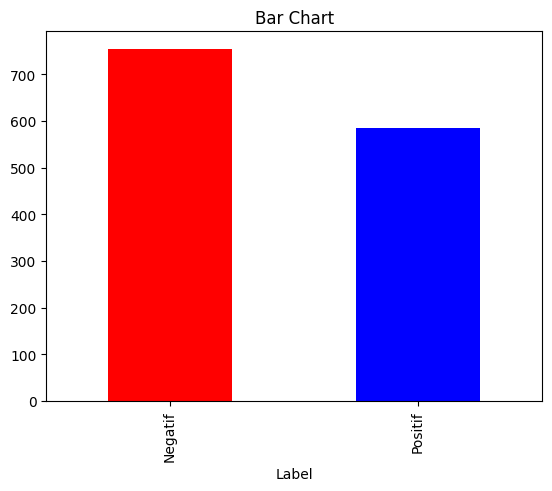

In [ ]:
sentimen_data = pd.value_counts(data_clean['Label'], sort= True)
sentimen_data.plot(kind='bar', color=['red','blue','green'])
plt.title('Bar Chart')
plt.show

In [ ]:
print(len(data_clean))

1339


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# train_negatif = df[df['Label'] == 'Negatif']
train_negatif = data_clean[data_clean['Label'] == 'Negatif']

In [ ]:
negatif_count = (data_clean['Label'] == "Negatif").sum()
print(f"Jumlah review negatif: {negatif_count}")

Jumlah review negatif: 754


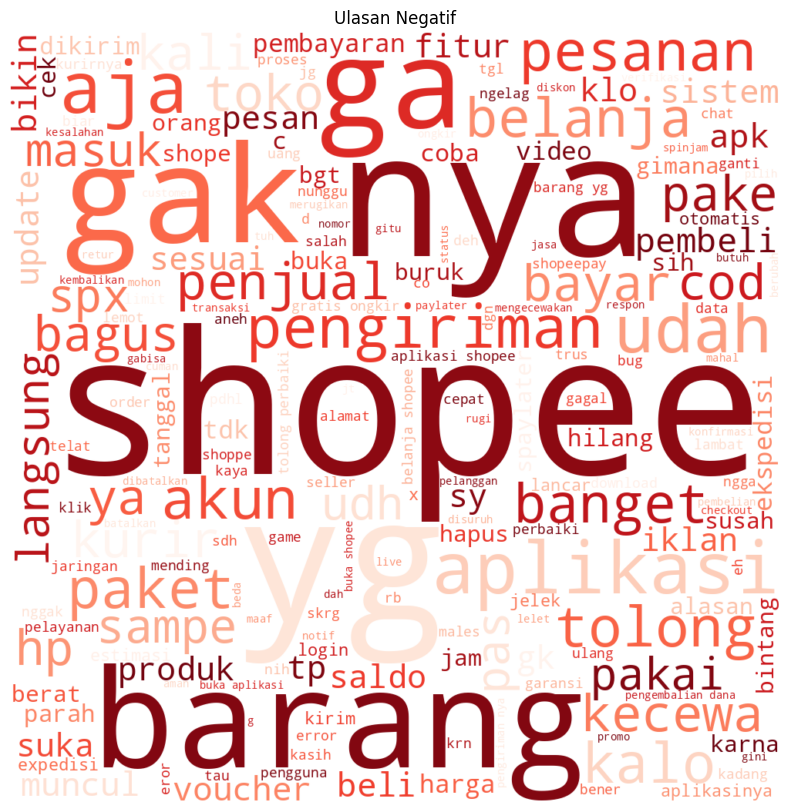

In [ ]:
all_text_negatif = ' '.join(word for word in train_negatif['text_StopWord'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_negatif)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ulasan Negatif')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_positif = data_clean[data_clean['Label'] == 'Positif']

In [ ]:
positif_count = (data_clean['Label'] == "Positif").sum()
print(f"Jumlah review positif: {positif_count}")

Jumlah review positif: 585


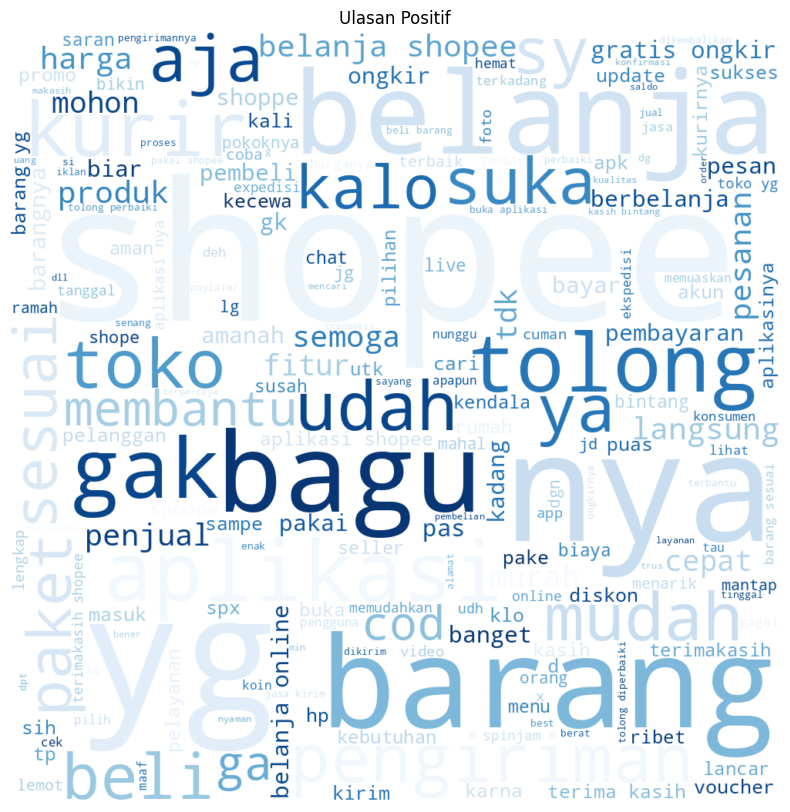

In [ ]:
all_text_positif = ' '.join(word for word in train_positif['text_StopWord'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positif)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ulasan Positif')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
import joblib

In [ ]:
#Simpan model
joblib.dump(nb, 'naive_bayes_model.joblib')

#Simpan vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print("Model dan vectorizer berhasil disimpan dengan joblib!")


Model dan vectorizer berhasil disimpan dengan joblib!


In [ ]:
import joblib

#Load model dan vectorizer
loaded_model = joblib.load('naive_bayes_model.joblib')
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')

print("Model dan vectorizer berhasil dimuat kembali!")


Model dan vectorizer berhasil dimuat kembali!


In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Akurasi Model: {accuracy:.2f}")

Akurasi Model: 0.81


In [ ]:
# Load model dan vectorizer
loaded_model = joblib.load('naive_bayes_model.joblib')
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Inputan pengguna
user_input = input("Masukkan kata atau kalimat untuk analisis sentimen: ")

# Preprocessing input pengguna
user_input_vectorized = loaded_vectorizer.transform([user_input])

# Prediksi sentimen
prediction = loaded_model.predict(user_input_vectorized)
prediction_proba = loaded_model.predict_proba(user_input_vectorized)

# Output hasil
print(f"\nKalimat: \"{user_input}\"")
print(f"Prediksi Sentimen: {prediction[0]}")
print(f"Probabilitas: {prediction_proba[0]}")


Masukkan kata atau kalimat untuk analisis sentimen: aplikasi jelek pengiriman lama

Kalimat: "aplikasi jelek pengiriman lama"
Prediksi Sentimen: Negatif
Probabilitas: [0.87298105 0.12701895]


In [ ]:
data_clean['tokens'] = data_clean['text_tokens'].apply(lambda x: x.split())

# Flatten list of lists dan hitung kemunculan
all_tokens = [token for sublist in data_clean['tokens'] for token in sublist]
kata_series = pd.Series(all_tokens)

# Hitung frekuensi kemunculan
print(kata_series.value_counts().head(5))


'shopee',    932
'yg',        697
'nya',       622
'barang',    530
'gak',       357
Name: count, dtype: int64
